In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('../data.csv')

<Axes: >

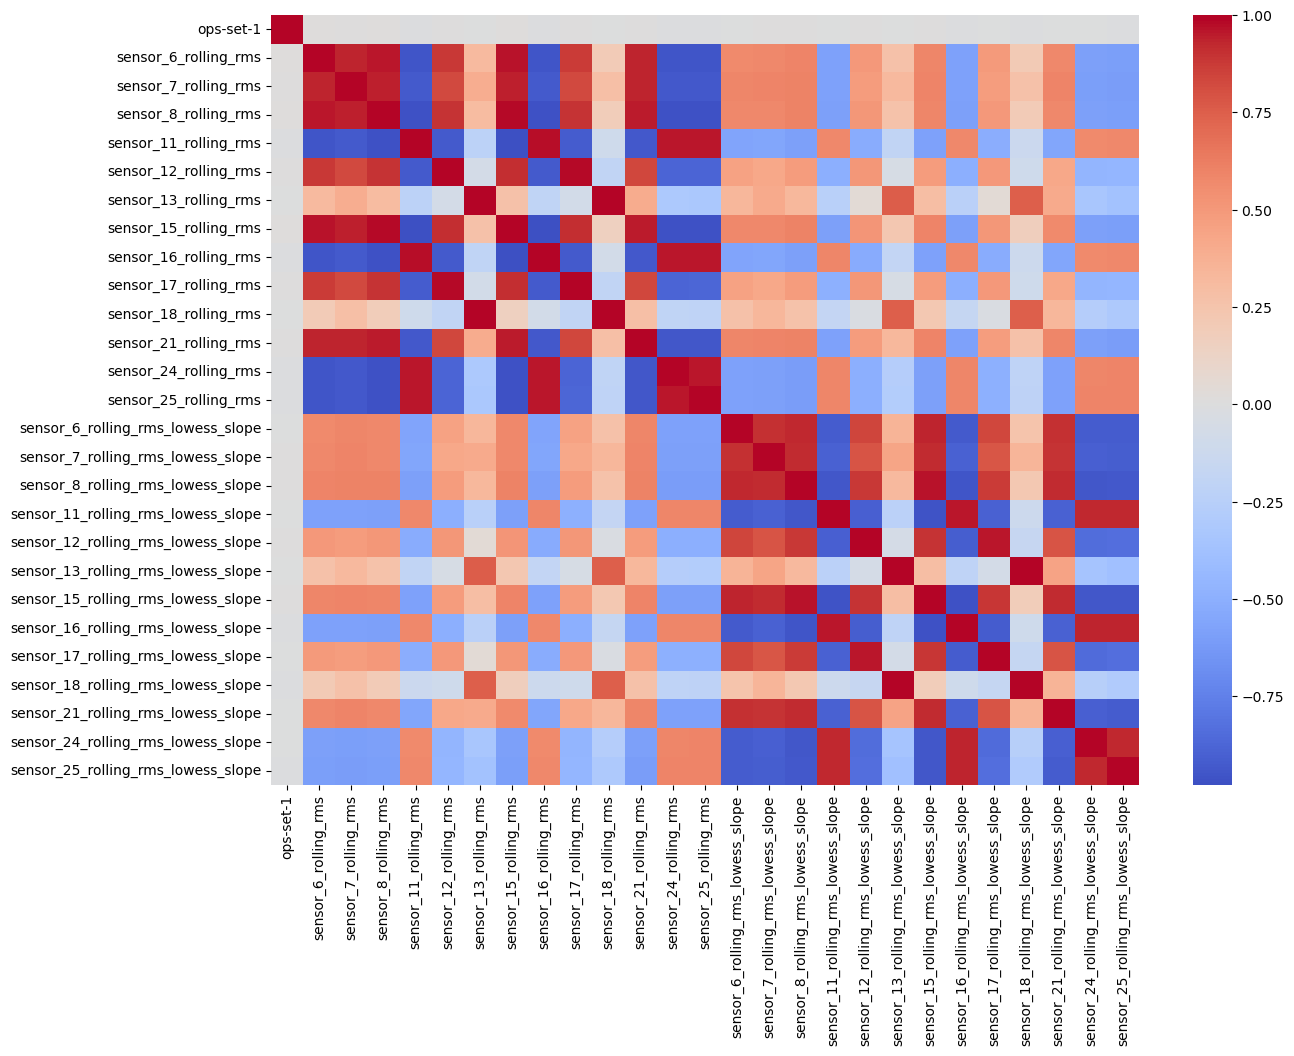

In [5]:
corr = data.drop(columns=['number', 'time', 'RUL']).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)

In [7]:
from sklearn.model_selection import train_test_split

engine_ids = data['number'].unique()
train_ids, test_ids = train_test_split(engine_ids, test_size=0.2, random_state=42)

train_df = data[data['number'].isin(train_ids)].copy()
test_df = data[data['number'].isin(test_ids)].copy()

In [8]:
feature_cols = [col for col in data.columns if col not in ['number', 'time', 'RUL']]

X_train = train_df[feature_cols]
y_train = train_df['RUL']

X_test = test_df[feature_cols]
y_test = test_df['RUL']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test)

In [11]:
y_pred

array([153.85, 154.07, 154.08, ...,   1.22,   0.71,   0.38])

In [24]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import precision_score, recall_score, r2_score

In [25]:
rmse = root_mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(rmse, r2_score)

19.93942546901485 0.9077575972838052


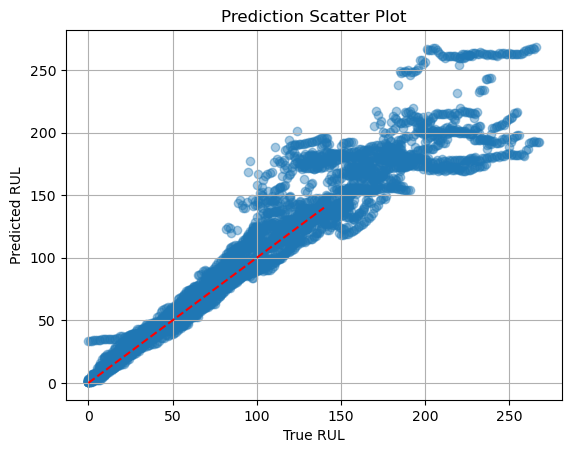

In [19]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("Prediction Scatter Plot")
plt.plot([0,140],[0,140], color='red', linestyle='--')
plt.grid(True)
plt.show()

In [23]:
y_pred[10]

156.04

In [ ]:
y_test[10]

181

In [26]:
from joblib import dump, load

dump(model, 'model_file_name.joblib')

['model_file_name.joblib']

In [ ]:
print("test")